In [1]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
%matplotlib inline 

In [2]:
# lendo os dados
uri = 'http://dadosabertos.ibama.gov.br/dados/SIFISC/auto_infracao/especime/especime.csv'
data = pd.read_csv(uri, sep=';')
data.head()

,SEQ_AUTO_INFRACAO,QUANTIDADE,UNIDADE,TIPO,GRUPO,NOME_POPULAR,NOME_CIENTIFICO,CITES,DESCRICAO,CARACTERISTICA,SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,447058,80,NaN,Pesca,Pescado,Surubim,Pseudoplatystoma corruscans,N,Carne,Morto,"80 kg, surubim inteiro, morto",06/12/2020 19:02
1,445521,2,Unidade,Fauna,Mamífero,Paca,NaN,N,Carne,Morto,02 indivíduos abatidos,06/12/2020 19:02
2,445521,1,Unidade,Fauna,Ave,Pato-do-mato,NaN,N,Carne,Morto,"01 indivíduo, abatida",06/12/2020 19:02
3,525209,60,kg (1.000 L),Pesca,Pescado,Tambaqui,NaN,N,Carne,Morto,tAMANHO INFERIOR AO PERMITIDO,06/12/2020 19:02
4,924555,1,Unidade,Fauna,Mamífero,Caititu,Pecari tajacu,N,NaN,Vivo,NaN,06/12/2020 19:02


In [3]:
# verificando as informações gerais do dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33629 entries, 0 to 33628
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   SEQ_AUTO_INFRACAO             33629 non-null  int64 
 1   QUANTIDADE                    33356 non-null  object
 2   UNIDADE                       33222 non-null  object
 3   TIPO                          33629 non-null  object
 4   GRUPO                         29406 non-null  object
 5   NOME_POPULAR                  31405 non-null  object
 6   NOME_CIENTIFICO               28848 non-null  object
 7   CITES                         33529 non-null  object
 8   DESCRICAO                     933 non-null    object
 9   CARACTERISTICA                33629 non-null  object
 10  SITUACAO                      122 non-null    object
 11  ULTIMA_ATUALIZACAO_RELATORIO  33629 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB


In [4]:
# excluindo as colunas que não pretendo usar
data.drop(['SEQ_AUTO_INFRACAO', 'ULTIMA_ATUALIZACAO_RELATORIO', 'NOME_CIENTIFICO', 'SITUACAO', 'UNIDADE', 'DESCRICAO'], 
          axis=1,
          inplace=True)
data.head()

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
0,80,Pesca,Pescado,Surubim,N,Morto
1,2,Fauna,Mamífero,Paca,N,Morto
2,1,Fauna,Ave,Pato-do-mato,N,Morto
3,60,Pesca,Pescado,Tambaqui,N,Morto
4,1,Fauna,Mamífero,Caititu,N,Vivo


In [5]:
# verificando quantas vezes cada grupo recebe um auto de infração
data['TIPO'].value_counts()

Fauna    25967
Flora     5296
Pesca     2366
Name: TIPO, dtype: int64

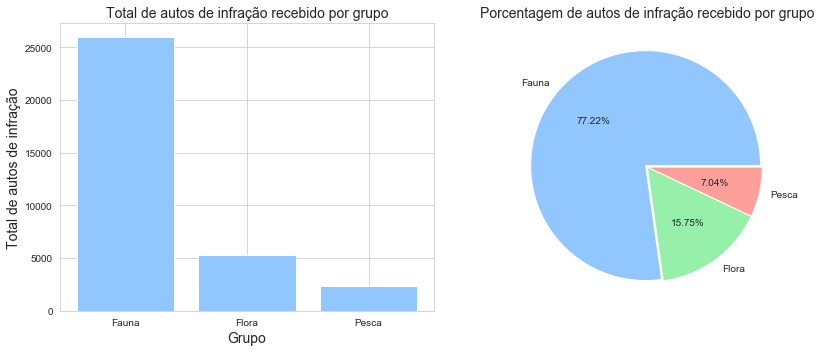

In [6]:
# verificando quantas vezes cada grupo recebe um auto de infração por meio de gráficos
x_values = data['TIPO'].value_counts().index
y_values = data['TIPO'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].bar(x_values, y_values)
ax[0].set_title('Total de autos de infração recebido por grupo',
                fontsize=14)
ax[0].set_xlabel('Grupo',
                 fontsize=14)
ax[0].set_ylabel('Total de autos de infração',
                 fontsize=14)

ax[1].pie(y_values, 
          labels=x_values, 
          autopct='%0.2f%%',
          explode=[0.02,0,0])
ax[1].set_title('Porcentagem de autos de infração recebido por grupo',
                fontsize=14)

plt.tight_layout()
plt.show()

### análise da fauna

como a fauna é o que mais aparece na coluna tipo, decidi fazer análise com ele

In [7]:
# criando um dataframe que contenha somente o 'tipo' fauna
data_fauna = data.loc[data['TIPO'] == 'Fauna']
data_fauna

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
1,2,Fauna,Mamífero,Paca,N,Morto
2,1,Fauna,Ave,Pato-do-mato,N,Morto
4,1,Fauna,Mamífero,Caititu,N,Vivo
5,1,Fauna,Ave,Papagaio-verdadeiro,N,Vivo
6,12,Fauna,Mamífero,Cutia,N,Vivo
...,...,...,...,...,...,...
33623,6,Fauna,Ave,Curió,N,Vivo
33624,1,Fauna,Ave,Bigodinho,N,Vivo
33625,1,Fauna,Ave,Caboclinho-lindo,N,Vivo
33626,1,Fauna,Ave,Bicudo,N,Vivo


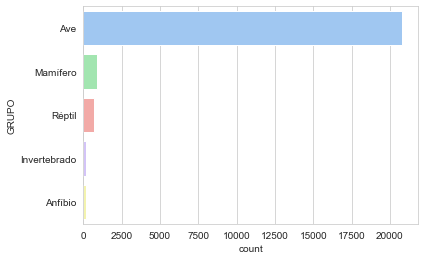

In [8]:
# verificando qual grupo de animais mais recebeu auto de infração

ordenado = data_fauna['GRUPO'].value_counts().index
sns.countplot(y='GRUPO', 
              data=data_fauna,
              order=ordenado)
plt.show()

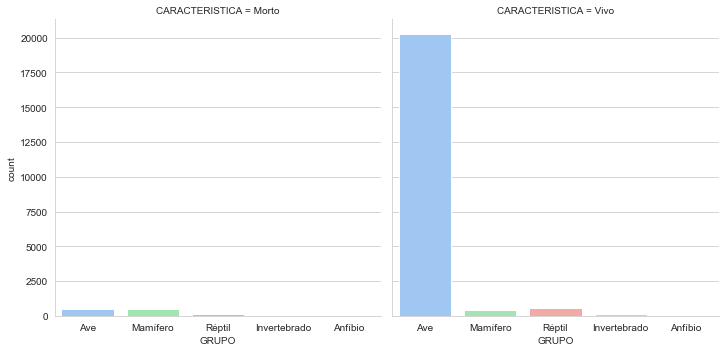

In [9]:
# verificando se os animais são mais encontrados vivos ou morto 
sns.catplot(x='GRUPO', 
            data=data_fauna,
            col='CARACTERISTICA',
            kind='count',
            order=ordenado)
plt.show()

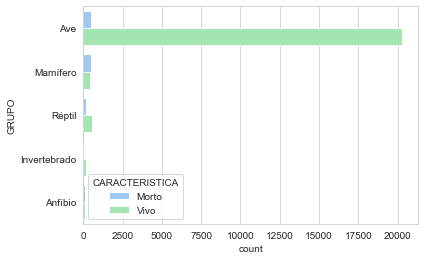

In [10]:
"""verificando se os animais são mais encontrados vivos ou morto, neste caso, como o total de aves é bem maior, 
foi mais fácil de comparar juntos no mesmo gráfico"""

sns.countplot(y='GRUPO', 
              data=data_fauna,
              hue='CARACTERISTICA',
              order=ordenado)
plt.show()

In [11]:
# separando somente as aves 
data_ave = data_fauna.query('GRUPO == "Ave"')
data_ave.head()

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
2,1,Fauna,Ave,Pato-do-mato,N,Morto
5,1,Fauna,Ave,Papagaio-verdadeiro,N,Vivo
8,1,Fauna,Ave,Curió,NaN,Vivo
9,1,Fauna,Ave,Papa-capim,N,Vivo
10,16,Fauna,Ave,NaN,NaN,Vivo


In [12]:
# removendo valores nulos da coluna nome popular e selecionando os 10 que mais receberam auto de infração
aves_capturadas = data_ave['NOME_POPULAR'].dropna().value_counts().head(10)

# criando um dataframe para as aves mais recorrentes
aves_mais_recorrentes = data_ave.loc[data_ave['NOME_POPULAR'].isin(aves_capturadas.index)]
aves_mais_recorrentes

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
8,1,Fauna,Ave,Curió,NaN,Vivo
9,1,Fauna,Ave,Papa-capim,N,Vivo
12,2,Fauna,Ave,Azulão,NaN,Vivo
23,1,Fauna,Ave,Golinho,N,Vivo
24,1,Fauna,Ave,Galo-da-campina,N,Vivo
...,...,...,...,...,...,...
33609,1,Fauna,Ave,Golinho,N,Vivo
33611,3,Fauna,Ave,Galo-da-campina,N,Vivo
33622,18,Fauna,Ave,Trinca-ferro-verdadeiro,N,Vivo
33623,6,Fauna,Ave,Curió,N,Vivo


In [13]:
# verificando informações do dataframe 
aves_mais_recorrentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9295 entries, 8 to 33624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   QUANTIDADE      9218 non-null   object
 1   TIPO            9295 non-null   object
 2   GRUPO           9295 non-null   object
 3   NOME_POPULAR    9295 non-null   object
 4   CITES           9282 non-null   object
 5   CARACTERISTICA  9295 non-null   object
dtypes: object(6)
memory usage: 508.3+ KB


In [14]:
aves_mais_recorrentes['QUANTIDADE'].isnull().sum()

77

In [15]:
# removendo valores nulos da coluna quantidade e transformando-a em número inteiro
aves_mais_recorrentes = aves_mais_recorrentes.dropna(subset=['QUANTIDADE'])
aves_mais_recorrentes['QUANTIDADE'] = aves_mais_recorrentes['QUANTIDADE'].astype('int')

C:\Users\Bia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
aves_mais_recorrentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9218 entries, 8 to 33624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   QUANTIDADE      9218 non-null   int32 
 1   TIPO            9218 non-null   object
 2   GRUPO           9218 non-null   object
 3   NOME_POPULAR    9218 non-null   object
 4   CITES           9205 non-null   object
 5   CARACTERISTICA  9218 non-null   object
dtypes: int32(1), object(5)
memory usage: 468.1+ KB


In [17]:
# verificando quantas vezes as aves mais recorrentes aparecem no dataframe
total_aves_mais_recorrentes = aves_mais_recorrentes['NOME_POPULAR'].value_counts()
total_aves_mais_recorrentes

Trinca-ferro-verdadeiro        1441
Galo-da-campina                1400
Canário-da-terra-verdadeiro    1105
Golinho                         907
Baiano                          889
Bigodinho                       827
Papa-capim                      827
Curió                           675
Sabiá-laranjeira                583
Azulão                          564
Name: NOME_POPULAR, dtype: int64

In [18]:
# verificando o total de aves capturados no dataframe aves_mais_recorrentes
aves_mais_recorrentes.pivot_table(index='NOME_POPULAR', 
                                  values='QUANTIDADE', 
                                  aggfunc='sum').sort_values(by='QUANTIDADE',
                                                             ascending=False)

,QUANTIDADE
NOME_POPULAR,
Canário-da-terra-verdadeiro,18513
Curió,5453
Trinca-ferro-verdadeiro,5246
Galo-da-campina,4696
Baiano,2862
Papa-capim,2520
Bigodinho,2177
Golinho,2016
Azulão,1365


In [19]:
# removendo linhas nulas
data_ave = data_ave.dropna(subset=['QUANTIDADE'])

In [20]:
# removendo linhas que não tinham valores inteiros
data_ave.drop([22036, 23686], inplace=True)
data_ave['QUANTIDADE'] = data_ave['QUANTIDADE'].astype('int')

In [21]:
# verificando quais espécies de aves mais foram encontradas
total_aves = data_ave.pivot_table(index='NOME_POPULAR', 
                     values='QUANTIDADE', 
                     aggfunc='sum').sort_values(by='QUANTIDADE', 
                                                ascending=False).head(10)
total_aves

,QUANTIDADE
NOME_POPULAR,
arribaçã,45943
Canário-da-terra-verdadeiro,18513
Avoante,11241
Canário-da-terra,9896
Curió,5453
Trinca-ferro-verdadeiro,5246
Galo-da-campina,4696
Mutum-do-norte,3430
Baiano,2862


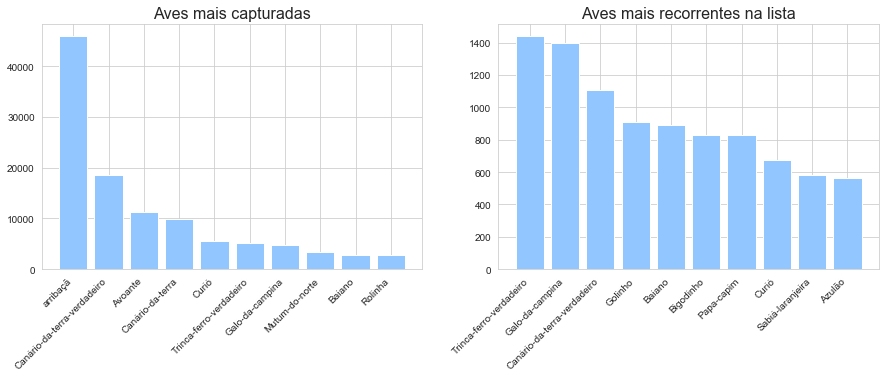

In [22]:
# comparando as espécies que mais foram capturadas das que mais apareceram na lista
f, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].bar(total_aves.index, total_aves['QUANTIDADE'])
ax[0].set_title('Aves mais capturadas', 
                fontsize=16)

ax[1].bar(total_aves_mais_recorrentes.index, total_aves_mais_recorrentes.values)
ax[1].set_title('Aves mais recorrentes na lista',
                fontsize=16)

f.autofmt_xdate(rotation=45)
plt.show()

### analisando os outros grupos da fauna

In [23]:
# criando um dataframe sem aves
fauna_sem_ave = data_fauna.loc[data_fauna['GRUPO'] != 'Ave']
fauna_sem_ave

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
1,2,Fauna,Mamífero,Paca,N,Morto
4,1,Fauna,Mamífero,Caititu,N,Vivo
6,12,Fauna,Mamífero,Cutia,N,Vivo
7,1,Fauna,Mamífero,Tamanduá-mirim,N,Morto
18,1,Fauna,Mamífero,Gato-maracajá,N,Morto
...,...,...,...,...,...,...
33536,4,Fauna,Réptil,Jabuti,S,Vivo
33555,2,Fauna,NaN,Papagaio-verdadeiro,N,Vivo
33576,1,Fauna,Réptil,Teiú,N,Morto
33591,3,Fauna,NaN,Curió,N,Vivo


In [24]:
# verificando quanto cada um apareceu
fauna_sem_ave_count = fauna_sem_ave['GRUPO'].value_counts()
fauna_sem_ave_count

Mamífero        868
Réptil          683
Invertebrado    198
Anfíbio         158
Name: GRUPO, dtype: int64

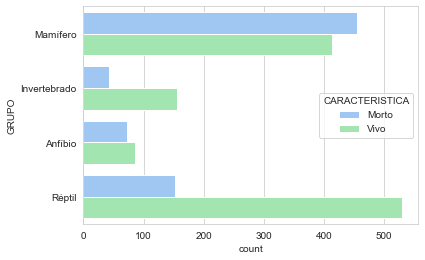

In [25]:
# criando um gráfico para ver se foram capturados mais animais mortos ou vivos
sns.countplot(y='GRUPO', 
              data=fauna_sem_ave,
              hue='CARACTERISTICA')
plt.show()

### valores nulos da fauna

In [26]:
# verificando os dados nulos
data_fauna_nulo = data_fauna.loc[data['GRUPO'].isnull()]
data_fauna_nulo

,QUANTIDADE,TIPO,GRUPO,NOME_POPULAR,CITES,CARACTERISTICA
54,3,Fauna,NaN,Papa-capim,N,Vivo
90,5840,Fauna,NaN,Avoante,N,Morto
111,73,Fauna,NaN,Swamp-ghost-crab,N,Vivo
112,1,Fauna,NaN,Papagaio-verdadeiro,S,Vivo
124,3,Fauna,NaN,arribaçã,N,Morto
...,...,...,...,...,...,...
33530,1,Fauna,NaN,Graúna,N,Vivo
33531,2,Fauna,NaN,Trinca-ferro-verdadeiro,N,Vivo
33555,2,Fauna,NaN,Papagaio-verdadeiro,N,Vivo
33591,3,Fauna,NaN,Curió,N,Vivo


In [27]:
# contando os nomes que mais apareceram
data_fauna_nulo['NOME_POPULAR'].value_counts()

Papa-capim                     243
Trinca-ferro-verdadeiro        209
Galo-da-campina                165
Canário-da-terra-verdadeiro    123
Bigodinho                       94
                              ... 
Rola-comum                       1
Curimatã                         1
Jacaré-tinga                     1
Golden-conure                    1
Tiriba-de-orelha-branca          1
Name: NOME_POPULAR, Length: 428, dtype: int64

### Considerações da análise:

- a fauna recebeu maior número de auto de infração;
- as aves tem mais ocorrencia que os outros animais;
- a espécie de ave arribaçã foi a mais capturada, porém a espécie Trinca-ferro-verdadeiro foi a que mais apareceu em autos de infração;
- os mamíferos são os unicos que em sua maioria, estão mais mortos do que vivos;
- os valores analisados para a fauna podem sem alterados pois, há um dataframe com 3244 linhas nulas, sendo que não há a repetição de 'nome_popular' 428 vezes; 
- mais análises devem ser realizadas nessa base de dados